In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("machine_downtime.csv")

In [4]:
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure(bar)      2490 non-null   float64
 4   Coolant_Pressure(bar)        2481 non-null   float64
 5   Air_System_Pressure(bar)     2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed(RPM)           2494 non-null   float64
 12  Voltage(volts)               2494 non-null   float64
 13  Torque(Nm)        

In [6]:
df.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [7]:
df.columns = df.columns.str.lower().str.strip()

In [8]:
# checking for imbalance on target columns
df.value_counts(["downtime"])

downtime          
Machine_Failure       1265
No_Machine_Failure    1235
Name: count, dtype: int64

In [9]:
df.shape

(2500, 16)

In [10]:
df.nunique()

date                            164
machine_id                        3
assembly_line_no                  3
hydraulic_pressure(bar)        1977
coolant_pressure(bar)          1628
air_system_pressure(bar)       2472
coolant_temperature             275
hydraulic_oil_temperature       209
spindle_bearing_temperature     204
spindle_vibration              1144
tool_vibration                 2350
spindle_speed(rpm)             1180
voltage(volts)                  238
torque(nm)                     1327
cutting(kn)                     170
downtime                          2
dtype: int64

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Length: 2500, dtype: bool

In [12]:
df.columns

Index(['date', 'machine_id', 'assembly_line_no', 'hydraulic_pressure(bar)',
       'coolant_pressure(bar)', 'air_system_pressure(bar)',
       'coolant_temperature', 'hydraulic_oil_temperature',
       'spindle_bearing_temperature', 'spindle_vibration', 'tool_vibration',
       'spindle_speed(rpm)', 'voltage(volts)', 'torque(nm)', 'cutting(kn)',
       'downtime'],
      dtype='object')

In [13]:
df.head()

,date,machine_id,assembly_line_no,hydraulic_pressure(bar),coolant_pressure(bar),air_system_pressure(bar),coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed(rpm),voltage(volts),torque(nm),cutting(kn),downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [14]:
machineid_downtime = df.groupby(["machine_id", "downtime"]).size().reset_index(name='count')
machineid_downtime

,machine_id,downtime,count
0,Makino-L1-Unit1-2013,Machine_Failure,454
1,Makino-L1-Unit1-2013,No_Machine_Failure,420
2,Makino-L2-Unit1-2015,Machine_Failure,396
3,Makino-L2-Unit1-2015,No_Machine_Failure,412
4,Makino-L3-Unit1-2015,Machine_Failure,415
5,Makino-L3-Unit1-2015,No_Machine_Failure,403


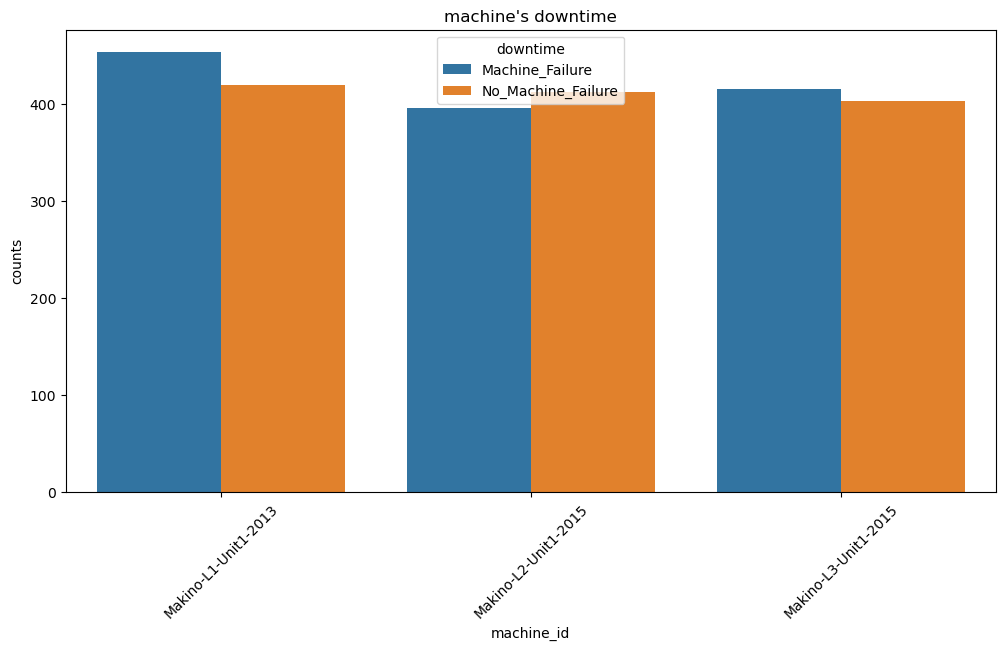

In [15]:
machineid_downtime = df.groupby(["machine_id", "downtime"]).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.barplot(data=machineid_downtime, x="machine_id", y="count", hue="downtime")
plt.title("machine's downtime")
plt.xlabel('machine_id')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.legend(title='downtime')
#plt.tight_layout()
plt.show()

## im trying to see how many downtimes weve had with our date column but the dates are all jumbled up we would work on our date column and try again

In [16]:
downtime_data = df[df['downtime'] == 'Machine_Failure']


downtime_trend = downtime_data.groupby('date').size().reset_index(name='downtime_count')

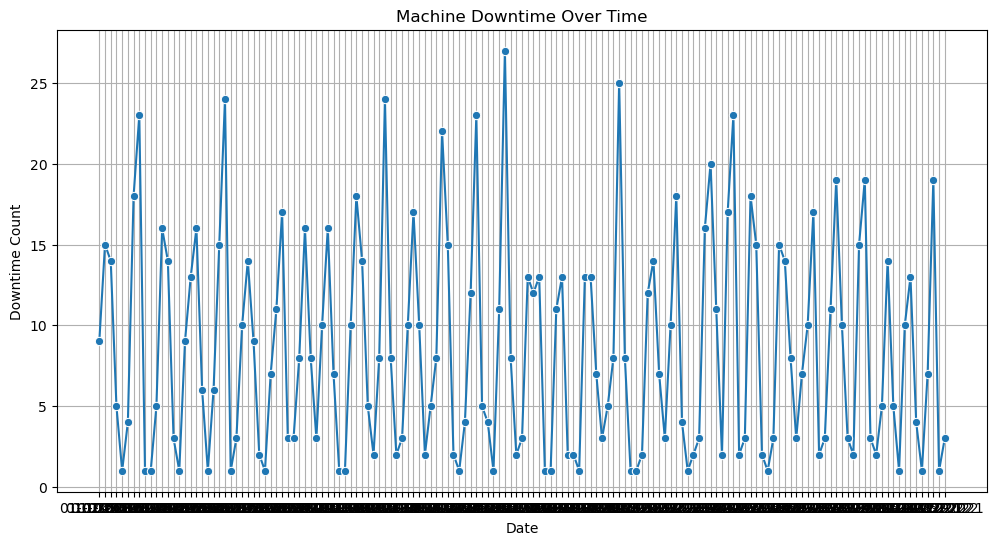

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=downtime_trend, x='date', y='downtime_count', marker='o')

plt.title('Machine Downtime Over Time')
plt.xlabel('Date')
plt.ylabel('Downtime Count')
plt.grid(True)
plt.show()


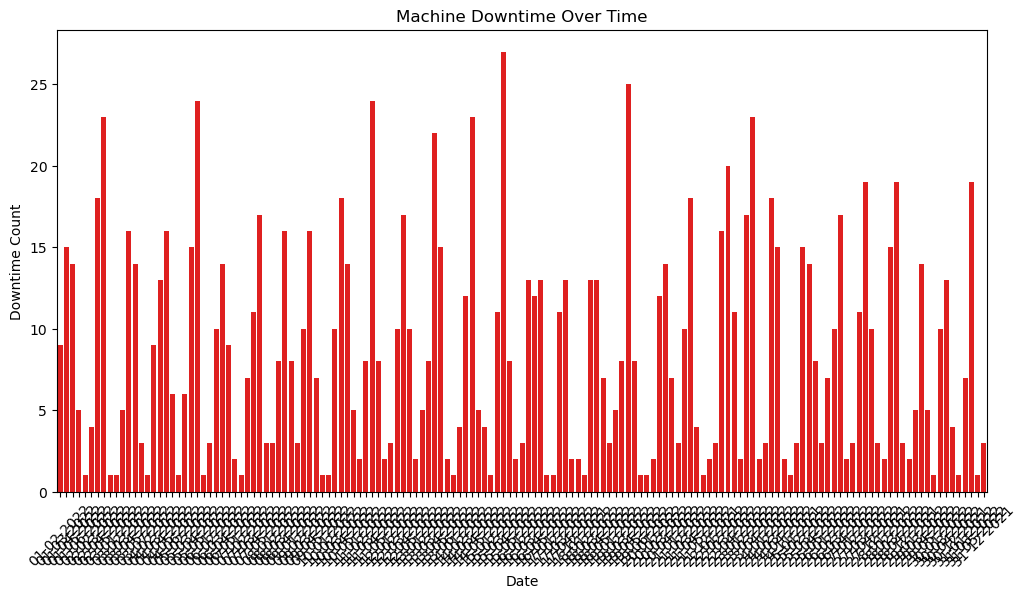

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(data=downtime_trend, x='date', y='downtime_count', color='red')

plt.title('Machine Downtime Over Time')
plt.xlabel('Date')
plt.ylabel('Downtime Count')
plt.xticks(rotation=45)  
plt.show()



## lets wor on our date column converting it to datetime object


In [19]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [20]:
df.date[:1000]

0     2021-12-31
1     2021-12-31
2     2021-12-31
3     2022-05-31
4     2022-03-31
         ...    
995   2022-04-18
996   2022-04-18
997   2022-04-18
998   2022-04-18
999   2022-04-18
Name: date, Length: 1000, dtype: datetime64[ns]

In [21]:
date_index = df.columns.get_loc('date')

In [22]:
df.insert(date_index, 'year', df['date'].dt.year)
df.insert(date_index + 1, 'month', df['date'].dt.month)
df.insert(date_index + 1, 'day', df['date'].dt.day)

In [23]:
df.head()

,year,day,month,date,machine_id,assembly_line_no,hydraulic_pressure(bar),coolant_pressure(bar),air_system_pressure(bar),coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed(rpm),voltage(volts),torque(nm),cutting(kn),downtime
0,2021,31,12,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,2021,31,12,2021-12-31,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,2021,31,12,2021-12-31,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,2022,31,5,2022-05-31,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,2022,31,3,2022-03-31,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


### lets visualize how machines fared according to machine_failure in our downtime over the years

In [24]:
downtime_data = df[df['downtime'] == 'Machine_failure']
downtime_counts = downtime_data.groupby(['year', 'machine_id']).size().reset_index(name='downtime_count')

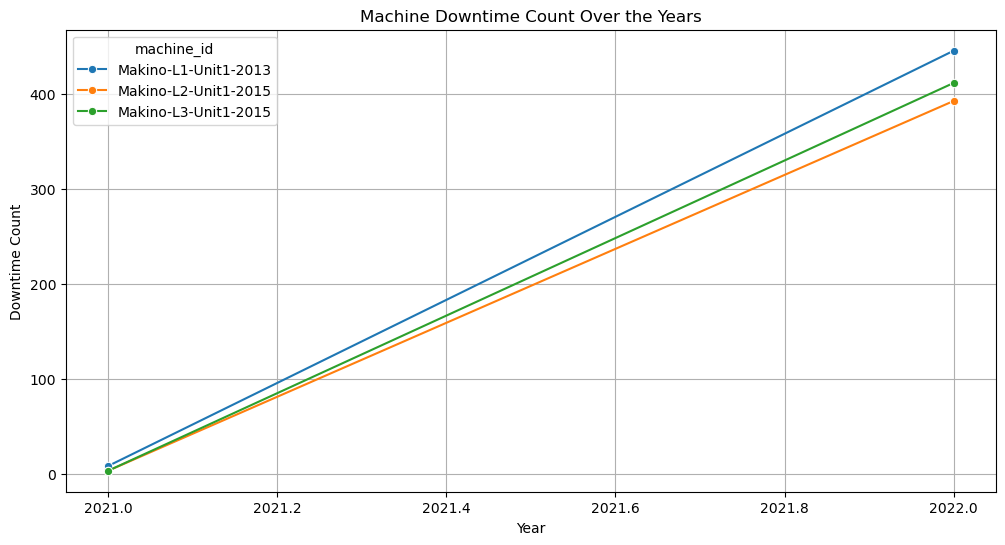

In [25]:

downtime_count = df[df['downtime'] == 'Machine_Failure'].groupby([df['year'], 'machine_id']).size().reset_index(name='downtime_count')

plt.figure(figsize=(12, 6))

sns.lineplot(data=downtime_count, x='year', y='downtime_count', hue='machine_id', marker='o')

plt.title('Machine Downtime Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Downtime Count')
plt.grid(True)

plt.show()


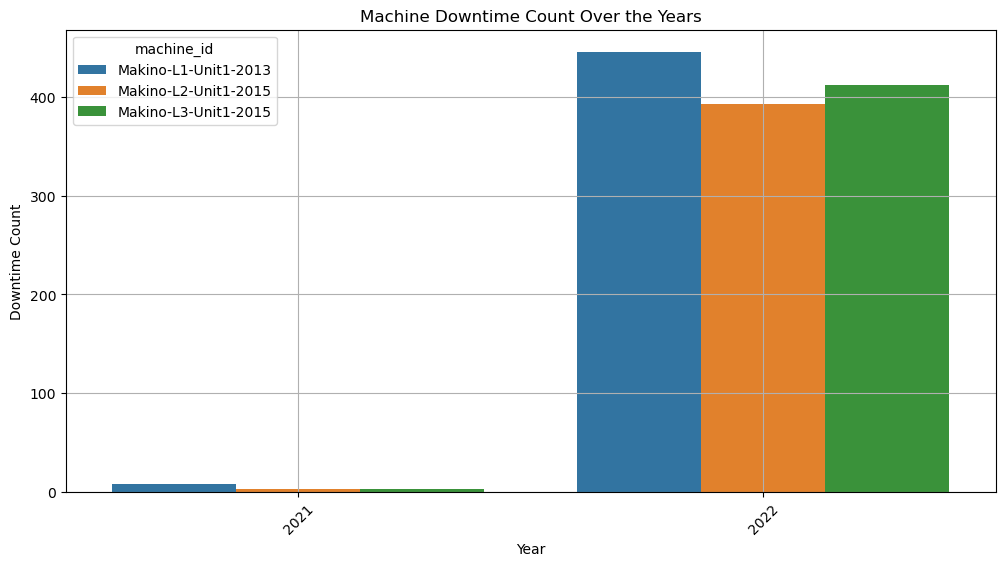

In [26]:
downtime_count = df[df['downtime'] == 'Machine_Failure'].groupby([df['year'], 'machine_id']).size().reset_index(name='downtime_count')

plt.figure(figsize=(12, 6))

sns.barplot(data=downtime_count, x='year', y='downtime_count', hue='machine_id')

plt.title('Machine Downtime Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Downtime Count')

plt.xticks(rotation=45)

plt.grid(True)
plt.show()

In [27]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['year', 'day', 'month', 'hydraulic_pressure(bar)',
       'coolant_pressure(bar)', 'air_system_pressure(bar)',
       'coolant_temperature', 'hydraulic_oil_temperature',
       'spindle_bearing_temperature', 'spindle_vibration', 'tool_vibration',
       'spindle_speed(rpm)', 'voltage(volts)', 'torque(nm)', 'cutting(kn)'],
      dtype='object')

### understanding other columns and how they may affect downtime

### Pressure Parameters
Hydraulic_Pressure (bar):Pressure in the hydraulic system, measured in bars. Hydraulic systems power machine components (e.g., lifts or presses). Low or high pressure could indicate system issues.

Coolant_Pressure (bar):Pressure of the coolant used to regulate temperature during operation. Abnormal coolant pressure can affect cooling efficiency.

Air_System_Pressure (bar):Pressure in the compressed air system, often used for pneumatic tools or machine cleaning.

## Temperature Parameters
    
Coolant_Temperature:Temperature of the coolant fluid. High temperatures might indicate insufficient cooling or a problem in the cooling system.

Hydraulic_Oil_Temperature:Temperature of the hydraulic fluid. High oil temperature can degrade fluid quality and affect machine performance.
    
Spindle_Bearing_Temperature:Temperature of the spindle's bearings, which affect rotational efficiency. Elevated temperatures might indicate wear or improper lubrication.

## Vibration Parameters

Spindle_Vibration:Measures vibrations in the spindle (rotating part of the machine). High vibrations can indicate alignment issues or worn components.
    
Tool_Vibration:Vibration measured in the tool during operation. Excessive tool vibration can lead to poor machining quality or tool wear.

## Operational Parameters
    
Spindle_Speed (RPM):The rotational speed of the spindle in revolutions per minute (RPM). This parameter is critical for cutting or machining processes.
    
Voltage (volts):Voltage supplied to the machine. Voltage fluctuations can affect performance or lead to system failures.

Torque (Nm):Rotational force exerted by the spindle, measured in Newton-meters (Nm). It impacts machining efficiency and cutting power.
    
Cutting (kN):The cutting force applied during machining, measured in kilonewtons (kN). It reflects the load on the tool and the material being processed.

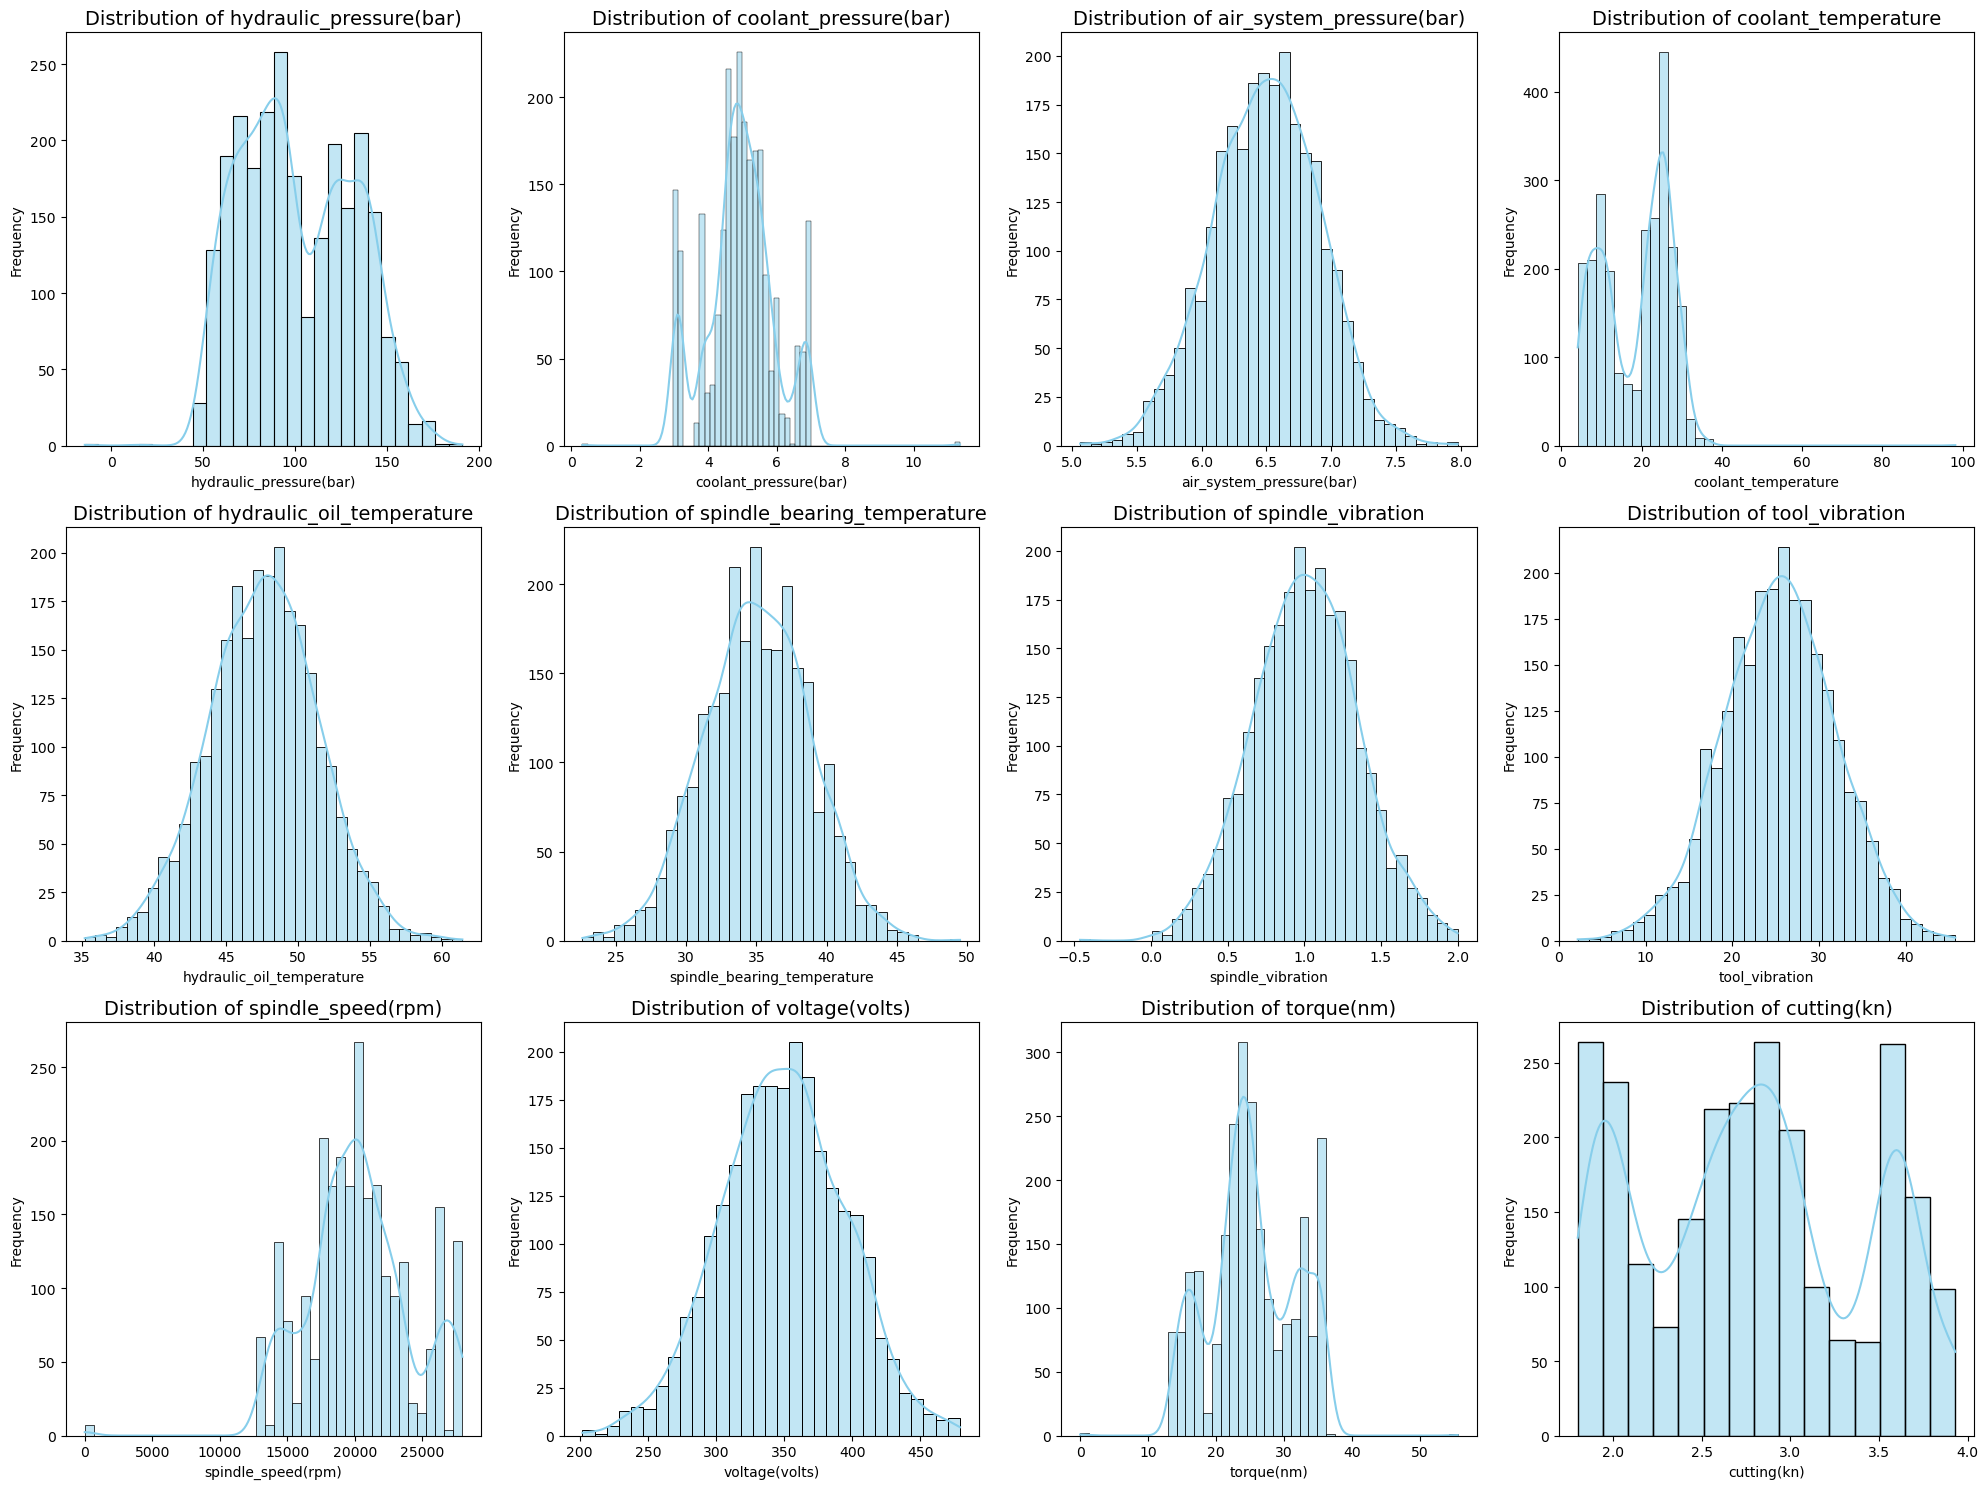

In [28]:
selected_columns = ['hydraulic_pressure(bar)',
       'coolant_pressure(bar)', 'air_system_pressure(bar)',
       'coolant_temperature', 'hydraulic_oil_temperature',
       'spindle_bearing_temperature', 'spindle_vibration', 'tool_vibration',
       'spindle_speed(rpm)', 'voltage(volts)', 'torque(nm)', 'cutting(kn)']


num_cols = len(selected_columns)
ncols = 4
nrows = (num_cols + ncols - 1) // ncols  

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))


axes = axes.flatten()


for j, column in enumerate(selected_columns):  
    sns.histplot(data=df, x=column, kde=True, ax=axes[j], color='skyblue')  
    axes[j].set_title(f'Distribution of {column}', fontsize=14)
    axes[j].set_xlabel(column)
    axes[j].set_ylabel('Frequency')

# Hide any unused subplots
for k in range(j + 1, len(axes)):
    axes[k].axis('off') 


plt.tight_layout()
plt.show()

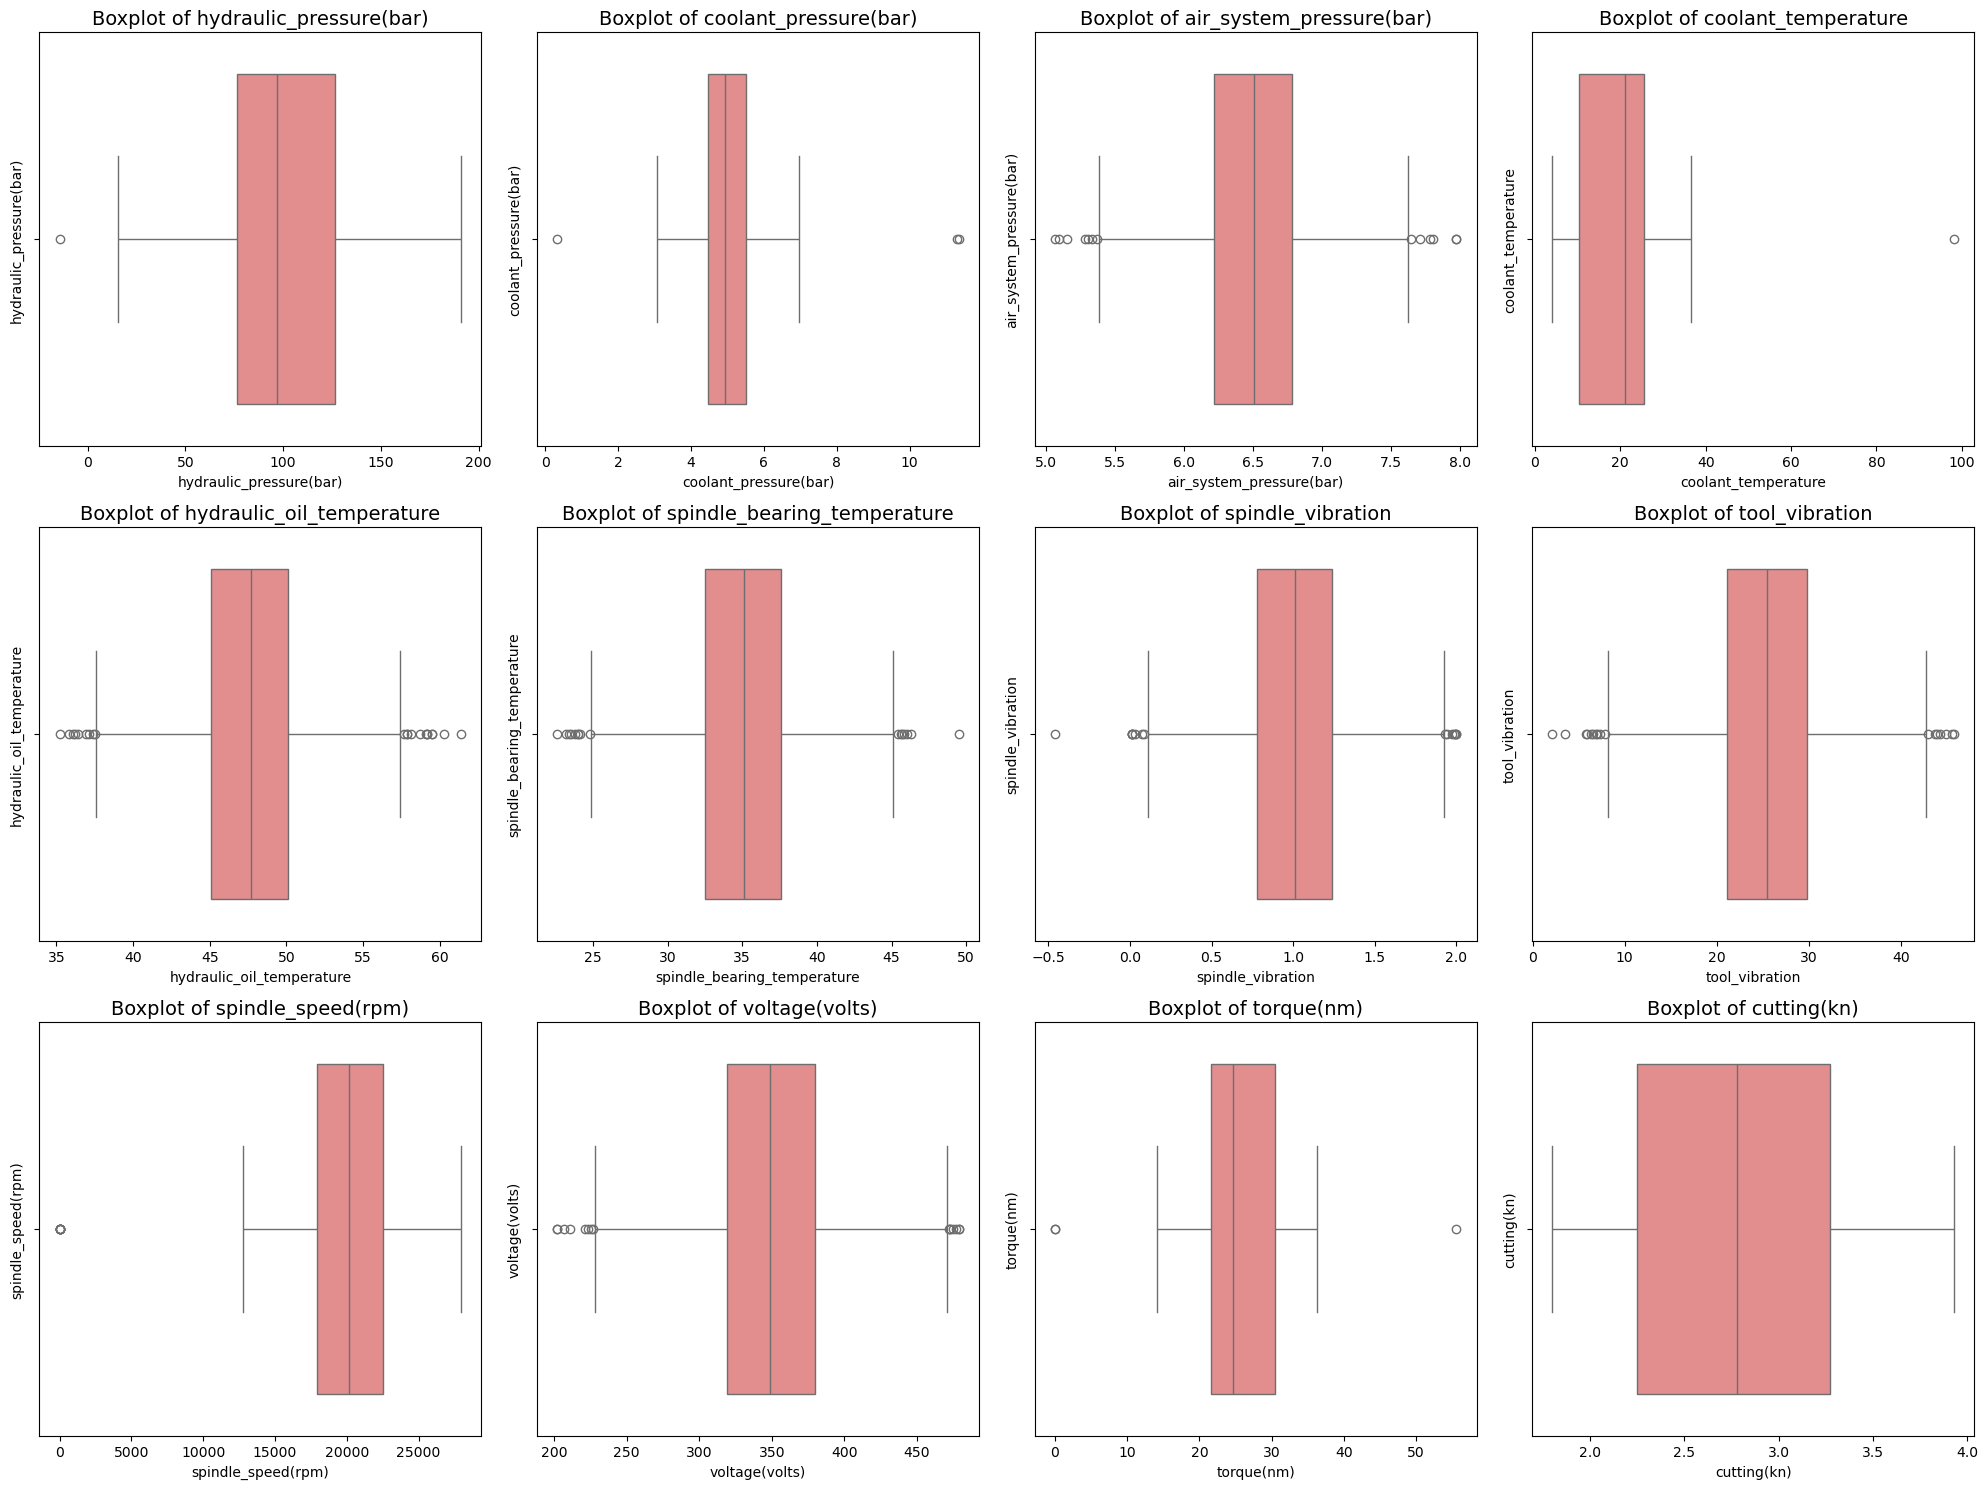

In [29]:
selected_columns_1 = ['hydraulic_pressure(bar)', 'coolant_pressure(bar)', 'air_system_pressure(bar)',
                      'coolant_temperature', 'hydraulic_oil_temperature', 'spindle_bearing_temperature',
                      'spindle_vibration', 'tool_vibration', 'spindle_speed(rpm)', 'voltage(volts)', 
                      'torque(nm)', 'cutting(kn)']

num_cols = len(selected_columns_1)
ncols = 4  # Number of columns in the grid
nrows = (num_cols + ncols - 1) // ncols  # Calculate required rows

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 5 * nrows))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot boxplots for selected columns
for j, column in enumerate(selected_columns_1):
    sns.boxplot(data=df, x=column, ax=axes[j], color='lightcoral')
    axes[j].set_title(f'Boxplot of {column}', fontsize=14)
    axes[j].set_ylabel(column)
    axes[j].tick_params(axis='y', rotation=45)  # Rotate y-axis ticks

# Turn off extra subplots
for k in range(j + 1, len(axes)):
    axes[k].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


### some of the columns have outliers would correct them after handling missing values

In [30]:
df.isnull().sum()

year                            0
day                             0
month                           0
date                            0
machine_id                      0
assembly_line_no                0
hydraulic_pressure(bar)        10
coolant_pressure(bar)          19
air_system_pressure(bar)       17
coolant_temperature            12
hydraulic_oil_temperature      16
spindle_bearing_temperature     7
spindle_vibration              11
tool_vibration                 11
spindle_speed(rpm)              6
voltage(volts)                  6
torque(nm)                     21
cutting(kn)                     7
downtime                        0
dtype: int64

In [31]:
columns_to_fill = ['hydraulic_pressure(bar)', 'coolant_pressure(bar)', 'air_system_pressure(bar)',
                   'coolant_temperature', 'hydraulic_oil_temperature', 'spindle_bearing_temperature',
                   'spindle_vibration', 'tool_vibration', 'spindle_speed(rpm)', 'voltage(volts)', 
                   'torque(nm)', 'cutting(kn)']

medians = {col: df[col].median() for col in columns_to_fill}

df.fillna(value=medians, inplace=True)

In [32]:
df.isnull().sum()

year                           0
day                            0
month                          0
date                           0
machine_id                     0
assembly_line_no               0
hydraulic_pressure(bar)        0
coolant_pressure(bar)          0
air_system_pressure(bar)       0
coolant_temperature            0
hydraulic_oil_temperature      0
spindle_bearing_temperature    0
spindle_vibration              0
tool_vibration                 0
spindle_speed(rpm)             0
voltage(volts)                 0
torque(nm)                     0
cutting(kn)                    0
downtime                       0
dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [34]:
df.head()

,year,day,month,date,machine_id,assembly_line_no,hydraulic_pressure(bar),coolant_pressure(bar),air_system_pressure(bar),coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed(rpm),voltage(volts),torque(nm),cutting(kn),downtime
0,2021,31,12,2021-12-31,0,0,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,0
1,2021,31,12,2021-12-31,0,0,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,0
2,2021,31,12,2021-12-31,2,2,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,0
3,2022,31,5,2022-05-31,1,1,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,0
4,2022,31,3,2022-03-31,0,0,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,0


### lets check for correlation

In [35]:
correlation_matrix = df.corr()  
correlation_matrix

,year,day,month,date,machine_id,assembly_line_no,hydraulic_pressure(bar),coolant_pressure(bar),air_system_pressure(bar),coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed(rpm),voltage(volts),torque(nm),cutting(kn),downtime
year,1.000000,-0.112541,-0.677442,0.274595,0.021705,0.021705,0.017561,-0.036487,0.036842,0.008062,-0.005918,0.012936,0.001859,-0.042224,-0.007075,-0.010654,0.036723,0.003223,0.010855
day,-0.112541,1.000000,-0.118778,-0.004945,0.051923,0.051923,-0.013200,0.008028,0.003216,-0.006393,-0.016186,0.003943,-0.030284,0.003056,-0.042613,0.004479,0.091164,0.033875,-0.011584
month,-0.677442,-0.118778,1.000000,0.490012,-0.043180,-0.043180,-0.001413,-0.028535,-0.021870,-0.013946,0.024444,-0.011566,-0.007758,0.036749,0.014830,-0.001171,-0.016416,-0.053022,-0.013066
date,0.274595,-0.004945,0.490012,1.000000,-0.016193,-0.016193,0.015311,-0.079820,0.016638,-0.011206,0.020390,0.001867,-0.017169,-0.001288,0.000232,-0.012825,0.048172,-0.055784,-0.007670
machine_id,0.021705,0.051923,-0.043180,-0.016193,1.000000,1.000000,0.007714,-0.004399,-0.014751,-0.009412,-0.000045,0.019730,0.019705,0.012958,-0.019434,0.006106,0.041041,0.004426,0.010375
assembly_line_no,0.021705,0.051923,-0.043180,-0.016193,1.000000,1.000000,0.007714,-0.004399,-0.014751,-0.009412,-0.000045,0.019730,0.019705,0.012958,-0.019434,0.006106,0.041041,0.004426,0.010375
hydraulic_pressure(bar),0.017561,-0.013200,-0.001413,0.015311,0.007714,0.007714,1.000000,-0.074172,-0.029626,-0.110024,0.008757,0.022682,-0.006549,0.020717,-0.119812,-0.004094,0.161633,-0.221135,0.556550
coolant_pressure(bar),-0.036487,0.008028,-0.028535,-0.079820,-0.004399,-0.004399,-0.074172,1.000000,-0.028545,0.007505,0.001206,-0.012655,0.005601,-0.005029,0.088646,0.030958,-0.102676,0.168051,-0.171058
air_system_pressure(bar),0.036842,0.003216,-0.021870,0.016638,-0.014751,-0.014751,-0.029626,-0.028545,1.000000,0.047054,-0.025746,0.009808,0.008790,0.045424,-0.001596,0.006630,0.036383,-0.000804,-0.009175
coolant_temperature,0.008062,-0.006393,-0.013946,-0.011206,-0.009412,-0.009412,-0.110024,0.007505,0.047054,1.000000,0.004318,-0.016708,0.012022,0.007151,0.072932,0.011629,-0.070211,0.096178,-0.167275


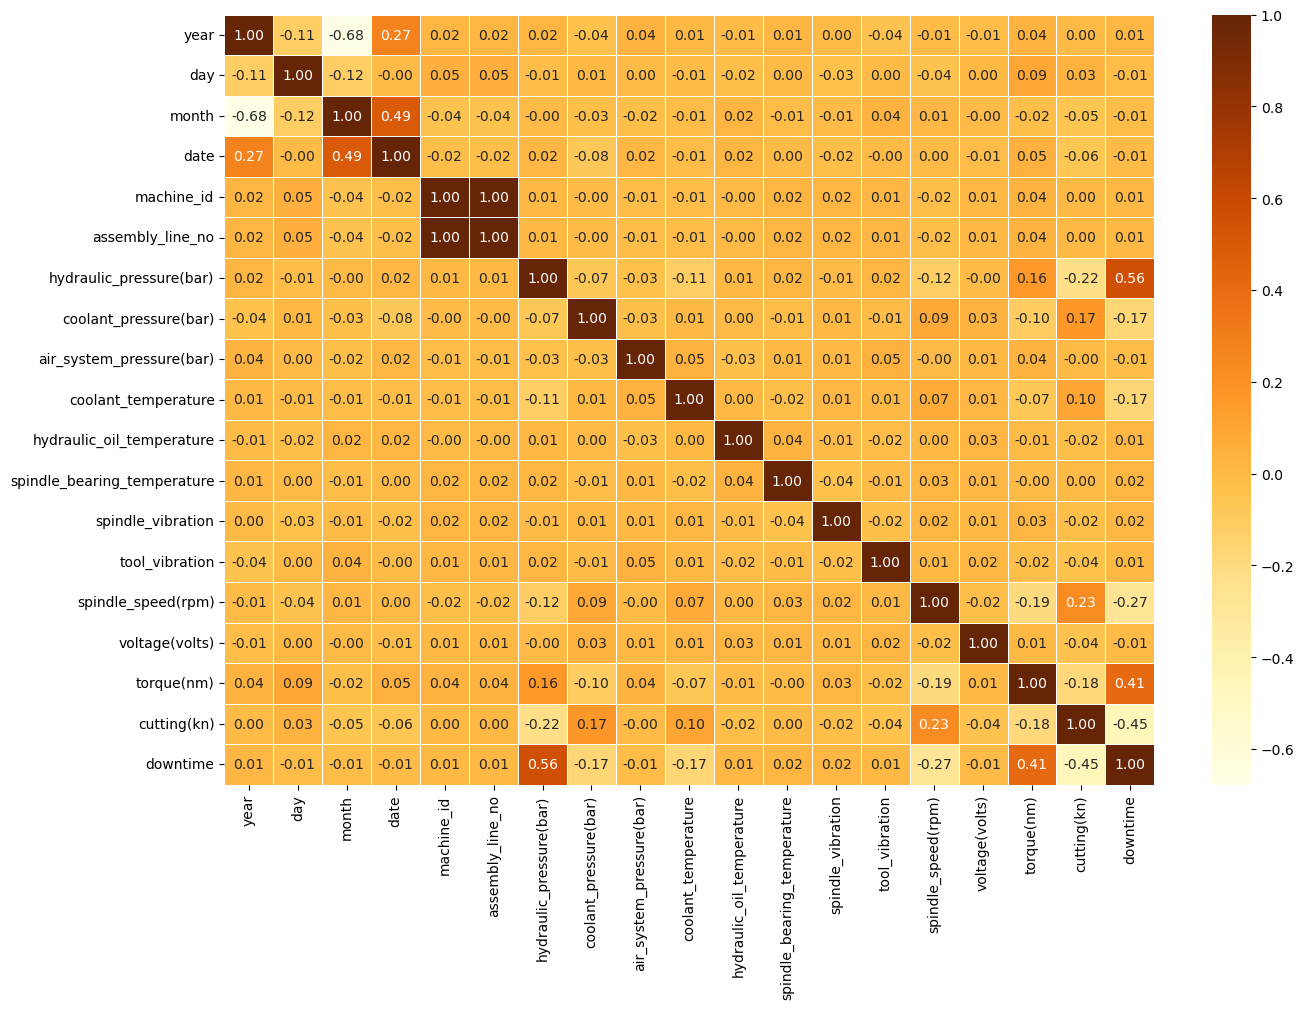

In [36]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlation_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap='YlOrBr')
plt.show()

In [37]:
df['spindle_vibration'] = np.log1p(df['spindle_vibration'])
df['tool_vibration'] = np.log1p(df['tool_vibration'])
df['spindle_bearing_temperature'] = np.log1p(df['spindle_bearing_temperature'])
df['voltage(volts)'] = np.log1p(df['voltage(volts)'])
df['hydraulic_oil_temperature'] = np.log1p(df['hydraulic_oil_temperature'])
df['air_system_pressure(bar)'] = np.log1p(df['air_system_pressure(bar)'])

In [38]:
df.head()

,year,day,month,date,machine_id,assembly_line_no,hydraulic_pressure(bar),coolant_pressure(bar),air_system_pressure(bar),coolant_temperature,hydraulic_oil_temperature,spindle_bearing_temperature,spindle_vibration,tool_vibration,spindle_speed(rpm),voltage(volts),torque(nm),cutting(kn),downtime
0,2021,31,12,2021-12-31,0,0,71.04,6.933725,1.985813,25.6,3.850148,3.538057,0.828988,3.313895,25892.0,5.817111,24.055326,3.58,0
1,2021,31,12,2021-12-31,0,0,125.33,4.936892,1.973627,35.3,3.879500,3.572346,0.867940,3.268580,19856.0,5.910797,14.202890,2.68,0
2,2021,31,12,2021-12-31,2,2,71.12,6.839413,2.035418,13.1,3.730501,3.526361,0.841136,3.453410,19851.0,5.786897,24.049267,3.55,0
3,2022,31,5,2022-05-31,1,1,139.34,4.574382,2.022923,24.4,3.811097,3.728100,0.481191,3.459183,18461.0,5.888878,25.860029,3.55,0
4,2022,31,3,2022-03-31,0,0,60.51,6.893182,1.965886,4.1,3.877432,3.478158,0.684611,3.277748,26526.0,5.872118,25.515874,3.55,0


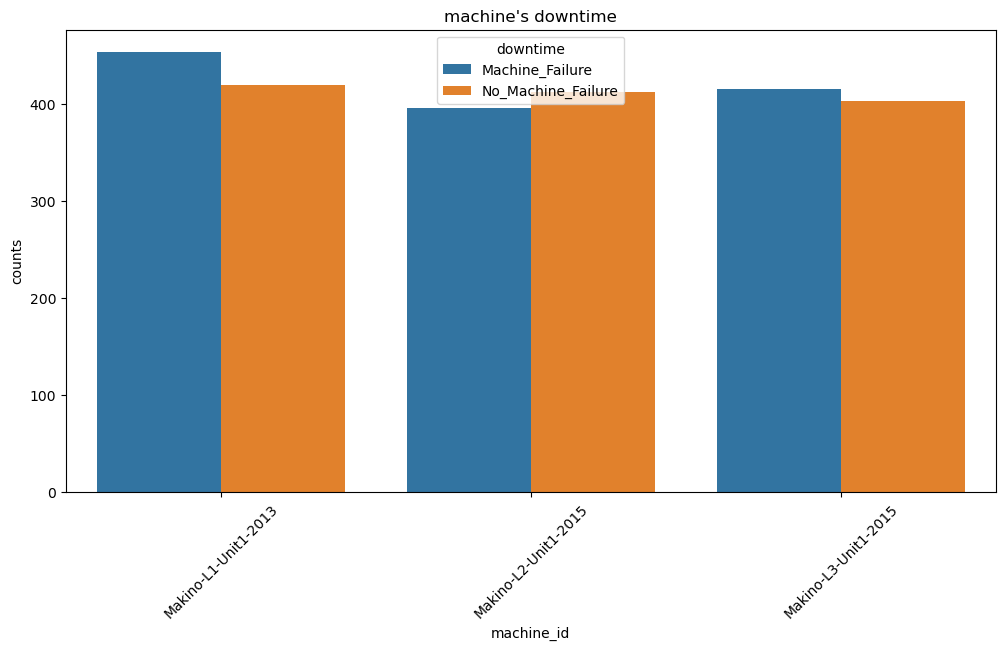

In [39]:
assembly_downtime = df.groupby(["machine_id", "downtime"]).size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.barplot(data=machineid_downtime, x="machine_id", y="count", hue="downtime")
plt.title("machine's downtime")
plt.xlabel('machine_id')
plt.ylabel('counts')
plt.xticks(rotation=45)
plt.legend(title='downtime')
#plt.tight_layout()
plt.show()

In [41]:
stats_summary = {
    'Feature': df.columns,
    'Mean': df.mean(),
    'Median': df.median(),
    'Mode': df.mode().iloc[0],  # Get the first mode
    'Standard Deviation':df.std()
}

# Convert to a DataFrame for better visualization
summary_df = pd.DataFrame(stats_summary)

# Display the statistics
summary_df

,Feature,Mean,Median,Mode,Standard Deviation
year,year,2021.99,2022.0,2022.0,0.099519
day,day,15.3392,15.0,15.0,8.629225
month,month,3.0232,3.0,3.0,1.326109
date,date,2022-03-13 05:57:41.760000,2022-03-14 00:00:00,2022-03-15 00:00:00,29 days 02:01:43.356446729
machine_id,machine_id,0.9776,1.0,0.0,0.822538
assembly_line_no,assembly_line_no,0.9776,1.0,0.0,0.822538
hydraulic_pressure(bar),hydraulic_pressure(bar),101.390501,96.763486,88.279134,30.23006
coolant_pressure(bar),coolant_pressure(bar),4.947005,4.93996,4.566854,0.993559
air_system_pressure(bar),air_system_pressure(bar),2.013338,2.015595,2.015595,0.054404
coolant_temperature,coolant_temperature,18.57256,21.2,26.4,8.535867
